# Value Iteration

Bu Notebook OpenAI Gym'de Ice World'de value iteration ornegi icermektedir.

In [64]:
# Import Stuff
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

max_iter = 1000
gamma = 0.9

# Frozen Lake

Kis geldi ve arkadaslarinizla firizbi oynuyorsunuz. Yanlislikla frizbiyi donmus bir gölun uzerine firlattiniz. Gidip firizbiyi almaniz gerekmekte. Fakat, donmus golun bazi yerlerinde delikler var ve delige dusebilirsiniz! Ayni zamanda yer kaygan oldugu icin gitmek istediginiz yerden baska yere gidebilirsiniz. Bu problemde göl bir _grid world_ olarak gosterilmektedir. Bu bir _discreate state_ ve _discrete action_ problemidir.

SFFF&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(S: _starting point_, guvenli)  
FHFH&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(F: _frozen surface_, guvenli)  
FFFH&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(H: _hole_, cehennem)  
HFFG&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(G: _goal_, firizbinin bulundugu yer)  

OpenAI Gym Notebookun'da asagidaki kodu kullanmistik.

```python
observation, reward, done, info = env.step(env.action_space.sample())
```

Artik rasgele aksiyonlar yerine, daha "akilli" secimler yapmamiz gerekmekte. Bunun icin her noktanin valuesunu iceren bir tablo olusturmamiz gerekiyor. Bu value tablosunu value iteration algoritmasi ile guncelleyecegiz edecegiz. Son olarak gol uzerinde her noktada valuesu en yuksek olan bir sonraki noktaya hareket edecegiz.

Value Iteration:  
$$V(s) \leftarrow max_a \sum_{s', r} P(s',r|s,a)[r(s) + \gamma V(s')]$$

$$P(s',r|s,a) = \frac{1}{3}$$

$$
r(s) = \left\{ \begin{array}{rl}
1 &\mbox{ if $s=G$} \\
0 &\mbox{ otherwise}
\end{array} \right.
$$

OpenAI Gym'de Environment objelerinin ``P`` sembolu bizlere butun olasi siradaki stateleri, odulu ve bitip bitmedigini vermektedir. Ornek: 

```python
for transition, nextstate, reward, done in env.P[s][a]:
```

In [71]:
# Value tablosunu olusturalim
env = gym.make('FrozenLake-v0')
values = np.zeros(env.nS)
policy = np.zeros(env.nS)

for i in range(max_iter):
    delta = 0.0
    for s in range(env.nS):
        v = values[s]
        action_values = np.zeros(env.nA)
        
        for a in range(env.nA):
            for transition, nextstate, reward, done in env.P[s][a]:
                action_values[a] += transition * (reward + gamma*values[nextstate])

        new_value = np.max(action_values)
        delta = np.max((delta, np.abs(new_value - v)))
        values[s] = new_value
        policy[s] = np.argmax(action_values)
        
    if delta < 1e-8:
        print("Converged at: {}".format(i+1))
        break
        
policy = policy.astype(np.int8)

Converged at: 85


In [72]:
# Our grid world
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


[0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]


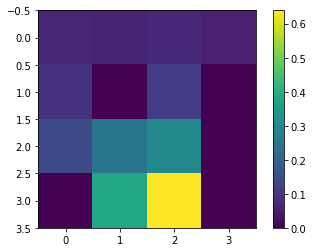

In [73]:
# Our values
print(policy)
img = plt.imshow(values.reshape(4,4))
plt.colorbar(img)

In [77]:
s = env.reset()
env.render()

while True:
    action = policy[s]   
    s, r, done, _ = env.step(action)
    env.render()
    
    if done:
        break
        
env.close()


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (